# Medical Cost Personal Datasets
### Insurance Forecast by using Linear Regression

## About Dataset
### Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

### Content
Columns

+ age: age of primary beneficiary

+ sex: insurance contractor gender, female, male

+ bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

+ children: Number of children covered by health insurance / Number of dependents

+ smoker: Smoking

+ region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

+ charges: Individual medical costs billed by health insurance

### Acknowledgements
The dataset is available on GitHub [here](https://github.com/stedy/Machine-Learning-with-R-datasets).

### Inspiration
Can you accurately predict insurance costs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


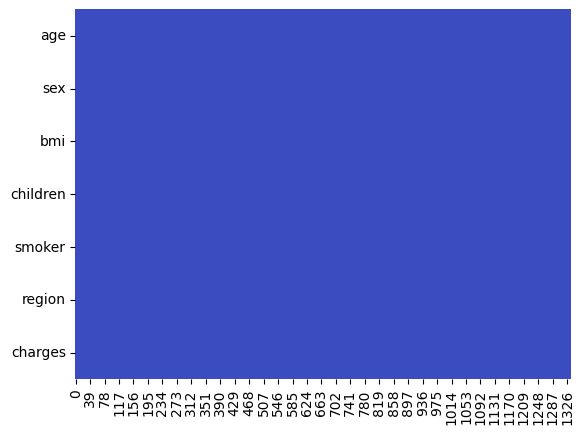

In [6]:
sns.heatmap(data.isna().T, cbar=False, cmap='coolwarm')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [9]:
smokers = data[data['smoker'] == 1]
non_smokers = data[data['smoker'] == 0]

print('Descr. Statistics for Charges Smokers')
print(smokers['charges'].describe(), '\n')

print('Descr. Statistics for Charges Non-smokers')
print(non_smokers['charges'].describe())


Descr. Statistics for Charges Smokers
count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64 

Descr. Statistics for Charges Non-smokers
count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64


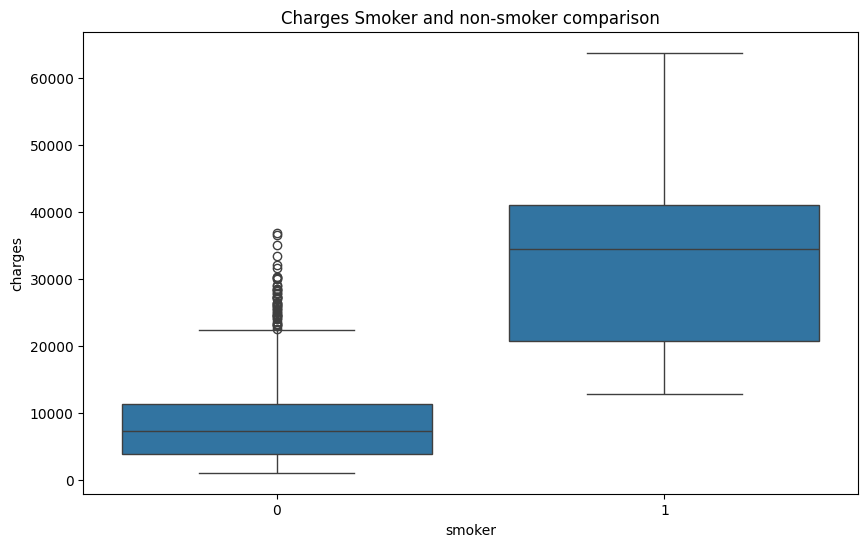

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Charges Smoker and non-smoker comparison')
plt.show()

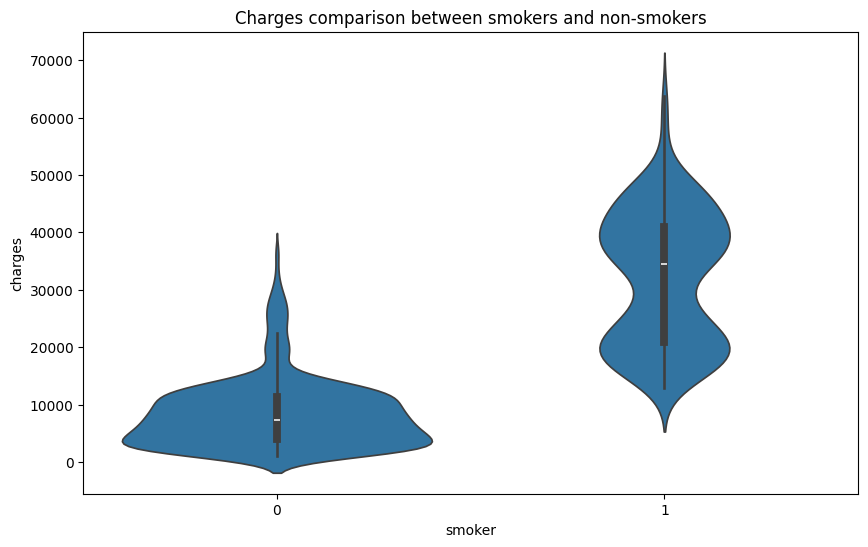

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='charges', data=data)
plt.title('Charges comparison between smokers and non-smokers')
plt.show()

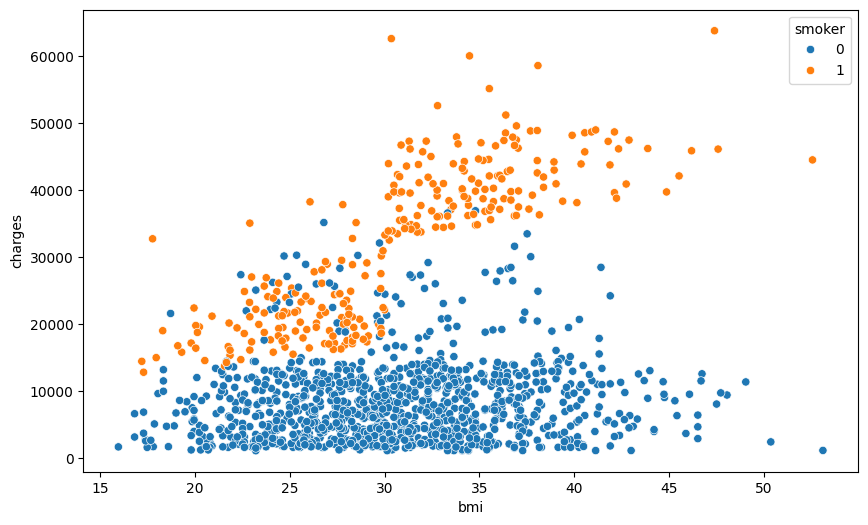

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data, hue='smoker')
plt.show()

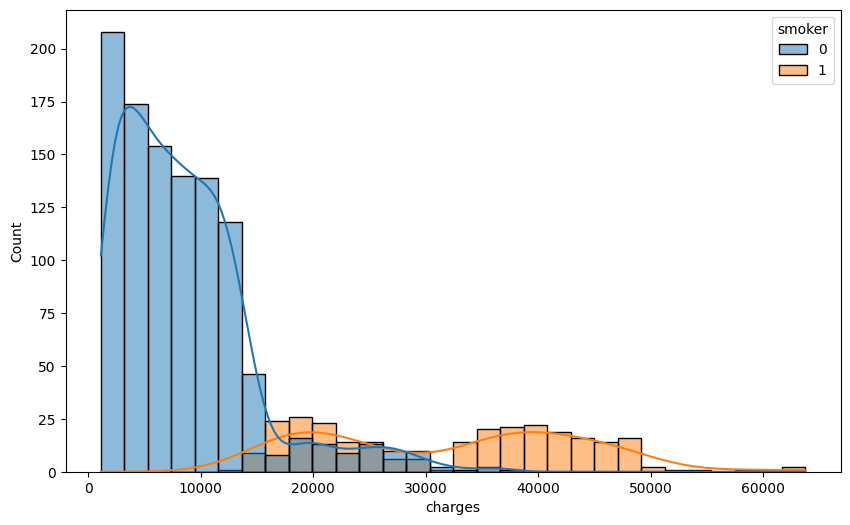

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(x='charges', data=data, kde=True, hue='smoker')
plt.show()

In [14]:
smoking_corr = data[['charges', 'smoker']].corr()
smoking_corr

,charges,smoker
charges,1.000000,0.787251
smoker,0.787251,1.000000


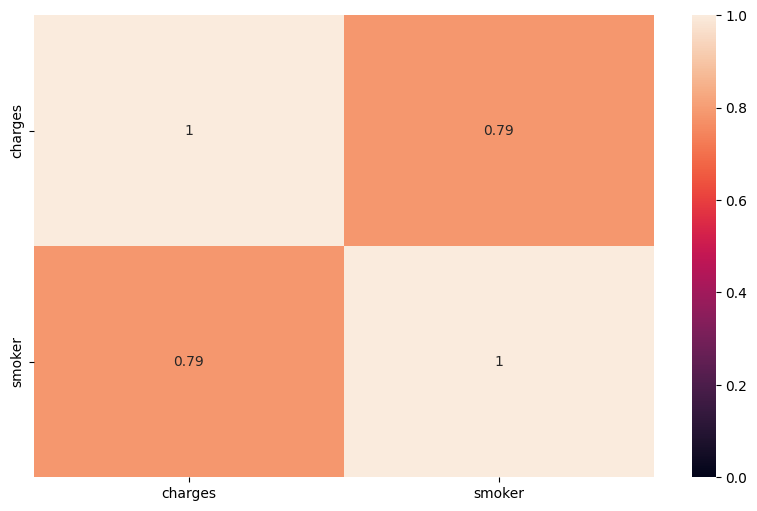

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=smoking_corr, vmin=0, vmax=1, annot=True)
plt.show()

In [16]:
map_corr = data.corr(numeric_only=True)
map_corr

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


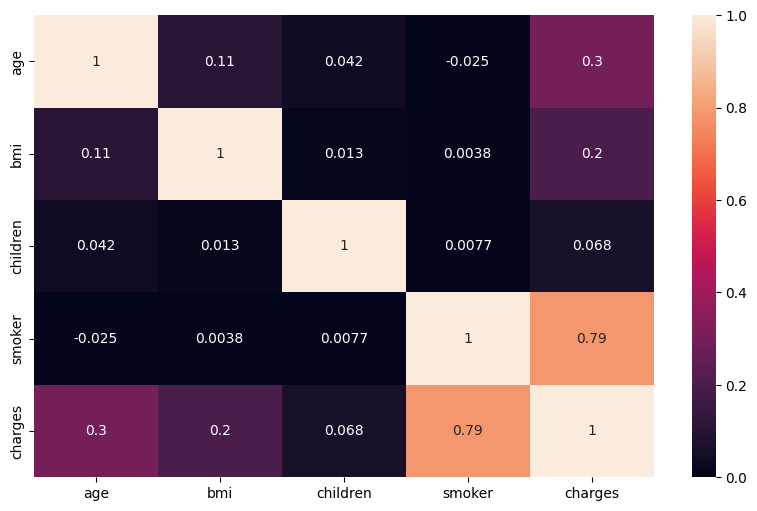

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=map_corr, vmin=0, vmax=1, annot=True)
plt.show()

# HOT ENCODING

In [20]:
data_corr = pd.get_dummies(drop_first=True, data=data)
data_corr

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.92400,False,False,False,True
1,18,33.770,1,0,1725.55230,True,False,True,False
2,28,33.000,3,0,4449.46200,True,False,True,False
3,33,22.705,0,0,21984.47061,True,True,False,False
4,32,28.880,0,0,3866.85520,True,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,True,True,False,False
1334,18,31.920,0,0,2205.98080,False,False,False,False
1335,18,36.850,0,0,1629.83350,False,False,True,False
1336,21,25.800,0,0,2007.94500,False,False,False,True


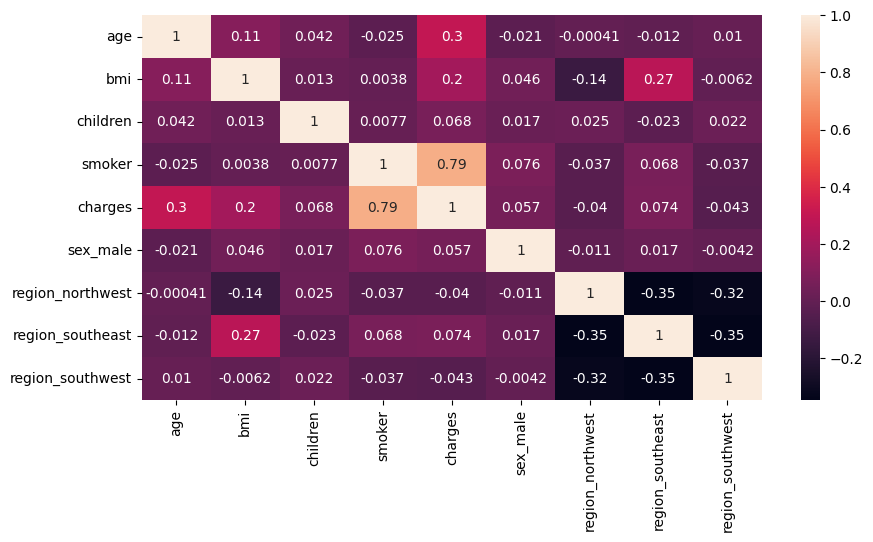

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(data=data_corr.corr(), annot=True)
plt.show()

# Split Dataset for Training and Testing

In [23]:
from sklearn.model_selection import train_test_split

X = data_corr.drop('charges', axis=1)
y = data_corr['charges']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [46]:
model_rand = RandomForestRegressor()
model_rand.fit(X_train, y_train)
display(model_rand.score(X_train, y_train))

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
model_lin.score(X_train, y_train)

0.9749386001813418

0.7417255854683333

In [52]:
print(f"Linear Model train score: {model_lin.score(X_train, y_train)}")
print(f"Random Forest train score: {model_rand.score(X_train, y_train)}")

Linear Model train score: 0.7417255854683333
Random Forest train score: 0.9749386001813418


In [53]:
print(f"Linear Model test score: {model_lin.score(X_test, y_test)}")
print(f"Random Forest test score: {model_rand.score(X_test, y_test)}")

Linear Model test score: 0.7835929767120724
Random Forest test score: 0.8602813195646228


In [80]:
rand_test_predict = model_rand.predict(X_test)
lin_test_predict = model_lin.predict(X_test)

rand_train_predict = model_rand.predict(X_train)
lin_train_predict = model_lin.predict(X_train)

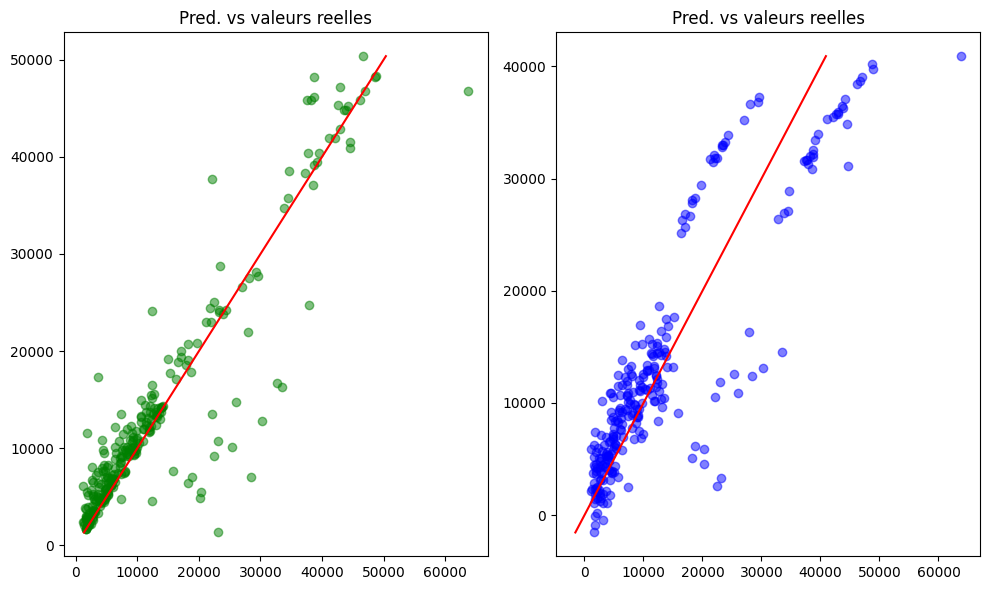

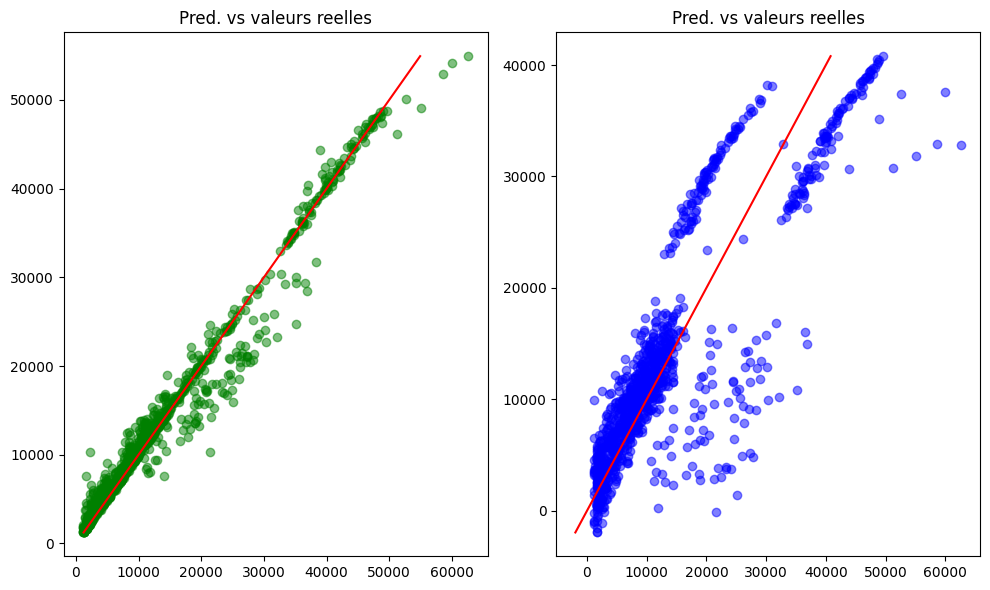

In [81]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.scatter(y_test, rand_test_predict, alpha=0.5, color='green', label='Random Forest')
plt.plot([rand_test_predict.min(), rand_test_predict.max()], [rand_test_predict.min(), rand_test_predict.max()], '-', color='red')
plt.title('Pred. vs valeurs reelles')

plt.subplot(1, 2, 2)
plt.scatter(y_test, lin_test_predict, alpha=0.5, color='blue', label='Linear Model')
plt.plot([lin_test_predict.min(), lin_test_predict.max()], [lin_test_predict.min(), lin_test_predict.max()], '-', color='red')
plt.title('Pred. vs valeurs reelles')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.scatter(y_train, rand_train_predict, alpha=0.5, color='green', label='Random Forest')
plt.plot([rand_train_predict.min(), rand_train_predict.max()], [rand_train_predict.min(), rand_train_predict.max()], '-', color='red')
plt.title('Pred. vs valeurs reelles')

plt.subplot(1, 2, 2)
plt.scatter(y_train, lin_train_predict, alpha=0.5, color='blue', label='Linear Model')
plt.plot([lin_train_predict.min(), lin_train_predict.max()], [lin_train_predict.min(), lin_train_predict.max()], '-', color='red')
plt.title('Pred. vs valeurs reelles')

plt.tight_layout()
plt.show()